In [1]:
import numpy as np
import pandas as pd
import random as r
import math
import os
from datetime import timedelta
import statistics as stats 

import matplotlib.pyplot as plot
import networkx as nx
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib

In [2]:
T = 10

In [3]:
sub_penalty = np.zeros(10)
delay_penalty = np.zeros(10)

In [4]:
for q in range(1,11):
    sub_penalty[q-1] = 1-(1/(11-q))
    delay_penalty[q-1]= 1-(1/q)

In [5]:
sub_penalty

array([0.9       , 0.88888889, 0.875     , 0.85714286, 0.83333333,
       0.8       , 0.75      , 0.66666667, 0.5       , 0.        ])

In [6]:
matplotlib.rcParams.update({'font.size': 14})

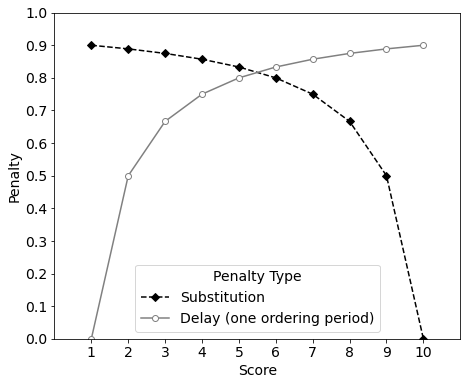

In [7]:
fig = plot.figure(figsize=(16, 6))
ax = fig.add_subplot(121)

n = 0
color = ['black', 'grey']
marker_desc = ['D', '*']

ax.plot(range(1,11), sub_penalty, color = 'black', label = 'Substitution', marker = 'D', linestyle = 'dashed')
ax.plot(range(1,11), delay_penalty, color = 'grey', label = 'Delay (one ordering period)', marker = 'o', markerfacecolor='white')
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, step=.1))
ax.set_xlim(0, 11)
ax.set_xticks(np.arange(1, 11, step=1))

ax.set_xlabel('Score')
ax.set_ylabel('Penalty')


ax.legend(title = 'Penalty Type')

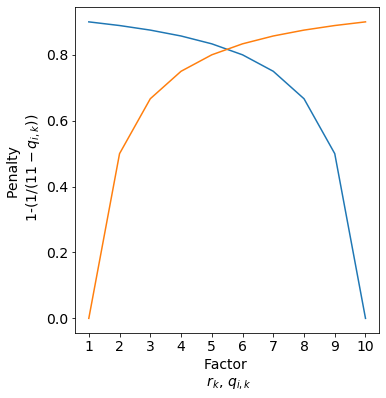

In [8]:
fig = plot.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
#ax.set_title('Penalties associated with reduced benefit of fulfilling demand')
ax.set_xlabel('Factor \n $r_{k}$, $q_{i,k}$')
ax.set_ylabel('Penalty \n 1-(1/($11-q_{i,k}$))')

ax.plot(np.arange(1, 11, step=1), sub_penalty)
ax.plot(np.arange(1, 11, step=1), delay_penalty)
ax.set_xticks(np.arange(1, 11, step=1))
ax.set_yticks(np.arange(0, 1, step=.2))
plot.show()

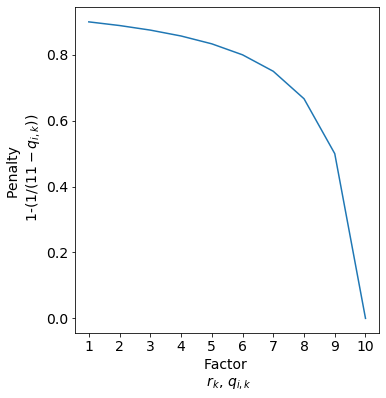

In [9]:
fig = plot.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
#ax.set_title('Penalties associated with reduced benefit of fulfilling demand')
ax.set_xlabel('Factor \n $r_{k}$, $q_{i,k}$')
ax.set_ylabel('Penalty \n 1-(1/($11-q_{i,k}$))')

ax.plot(np.arange(1, 11, step=1), sub_penalty)
ax.set_xticks(np.arange(1, 11, step=1))
ax.set_yticks(np.arange(0, 1, step=.2))
plot.show()

In [10]:
delay_penalty_dict = {}

In [11]:
delay_penalty_dict

{}

In [12]:
for r in [2,8]:
    temp_delay_penalty = np.zeros(4)
    for t in range(1,4):
        temp_delay_penalty[t] = 1-((1/r)**(t))
    delay_penalty_dict[r] = temp_delay_penalty

In [13]:
n = 0
line_style_desc = ['solid', 'dashed', ':']
marker_desc = ['o', 'D', 'o']
matplotlib.rcParams.update({'font.size': 12})
desc = ['$r_k$=', '$r_k$=']
color = ['darkgrey', 'grey']
marker_face = ['white', 'black']

Text(0, 0.5, 'Penalty')

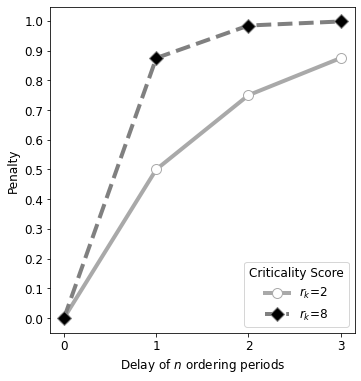

In [14]:
fig = plot.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

for r in [2,8]:
    ax.plot(delay_penalty_dict.get(r), marker=marker_desc[n], 
             markerfacecolor=marker_face[n], markersize=10, color=color[n], linewidth=4, label = desc[n] + str(r),
             linestyle = line_style_desc[n])
    n = n + 1
    
ax.set_xticks(np.arange(0, 4, step=1))
ax.set_yticks(np.arange(0, 1.1, step=.1))
    
plot.legend(title = 'Criticality Score', )
ax.set_xlabel('Delay of $n$ ordering periods')
ax.set_ylabel('Penalty')

In [124]:
n = 0
r = 2

Text(0, 0.5, 'Penalty')

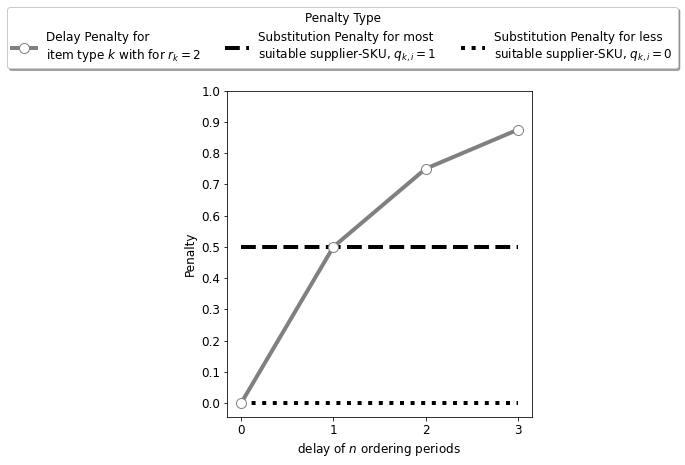

In [125]:
fig = plot.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

ax.plot(delay_penalty_dict.get(r), marker=marker_desc[n], 
         markerfacecolor='white', markersize=10, color='grey', linewidth=4, label = 'Delay Penalty for\nitem type $k$ with for $r_k = 2$',
         linestyle = line_style_desc[n])
ax.hlines(y=(1/2), xmin=0, xmax=3, linewidth=4, color='black', linestyle = 'dashed',
          label = 'Substitution Penalty for most\nsuitable supplier-SKU, '+ '$q_{k,i} = 1$')
ax.hlines(y=0, xmin=0, xmax=3, linewidth=4, color='black', linestyle = 'dotted', 
          label = 'Substitution Penalty for less\nsuitable supplier-SKU, '+ '$q_{k,i} = 0$')

#ax.plot(range(1,11), delay_penalty, color = 'grey', label = 'Delay (one ordering period)/\ncriticality score ($r_k$)', marker = 'o')
    
ax.set_xticks(np.arange(0, 4, step=1))
ax.set_yticks(np.arange(0, 1.1, step=.1))
    
plot.legend(title = 'Penalty Type', loc=4, bbox_to_anchor=(1.5, 1.05),
          fancybox=True, shadow=True, ncol=3)
ax.set_xlabel('delay of $n$ ordering periods')
ax.set_ylabel('Penalty')

In [182]:
delay_penalty_dict.get(2)

array([0.   , 0.5  , 0.75 , 0.875])